<a href="https://colab.research.google.com/github/MatheusRQ/Python-e-Data_Science/blob/main/Filmes_Generos_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv('https://raw.githubusercontent.com/MatheusRQ/Python-e-Data_Science/main/Databases%20Diversas/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
type(filmes)

pandas.core.frame.DataFrame

In [4]:
filmes.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [5]:
print(filmes.query('movieId == 1').genres)

0    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object


In [6]:
string = filmes.query('movieId == 1').genres.to_string()

In [7]:
type(string)

str

In [8]:
string_2 = string.split(' ')
string_2

['0', '', '', '', 'Adventure|Animation|Children|Comedy|Fantasy']

In [9]:
string_2 = string.split(' ')[4]
string_2

'Adventure|Animation|Children|Comedy|Fantasy'

In [10]:
lista = string_2.split('|')

In [11]:
lista

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [12]:
for generosListas in filmes.genres.head(10):
   print(generosListas.split('|'))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']
['Adventure', 'Children', 'Fantasy']
['Comedy', 'Romance']
['Comedy', 'Drama', 'Romance']
['Comedy']
['Action', 'Crime', 'Thriller']
['Comedy', 'Romance']
['Adventure', 'Children']
['Action']
['Action', 'Adventure', 'Thriller']


In [13]:
filmes_de_comedia = filmes.query('genres.str.contains("Comedy")', engine='python')

In [14]:
filmes_de_comedia.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [16]:
filmes_de_comedia.to_csv('comedyMovies.csv')

In [28]:
lista_generos = []

for generos in filmes.genres:
   for genero in generos.split('|'):
     lista_generos.append(genero)

In [31]:
total_generos = pd.Series(lista_generos)

In [32]:
total_generos.unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [62]:
total_generos_df = total_generos.value_counts().to_frame().reset_index()
total_generos_df.columns = ['genero', 'quantidade']
total_generos_df

,genero,quantidade
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize = (25,15))

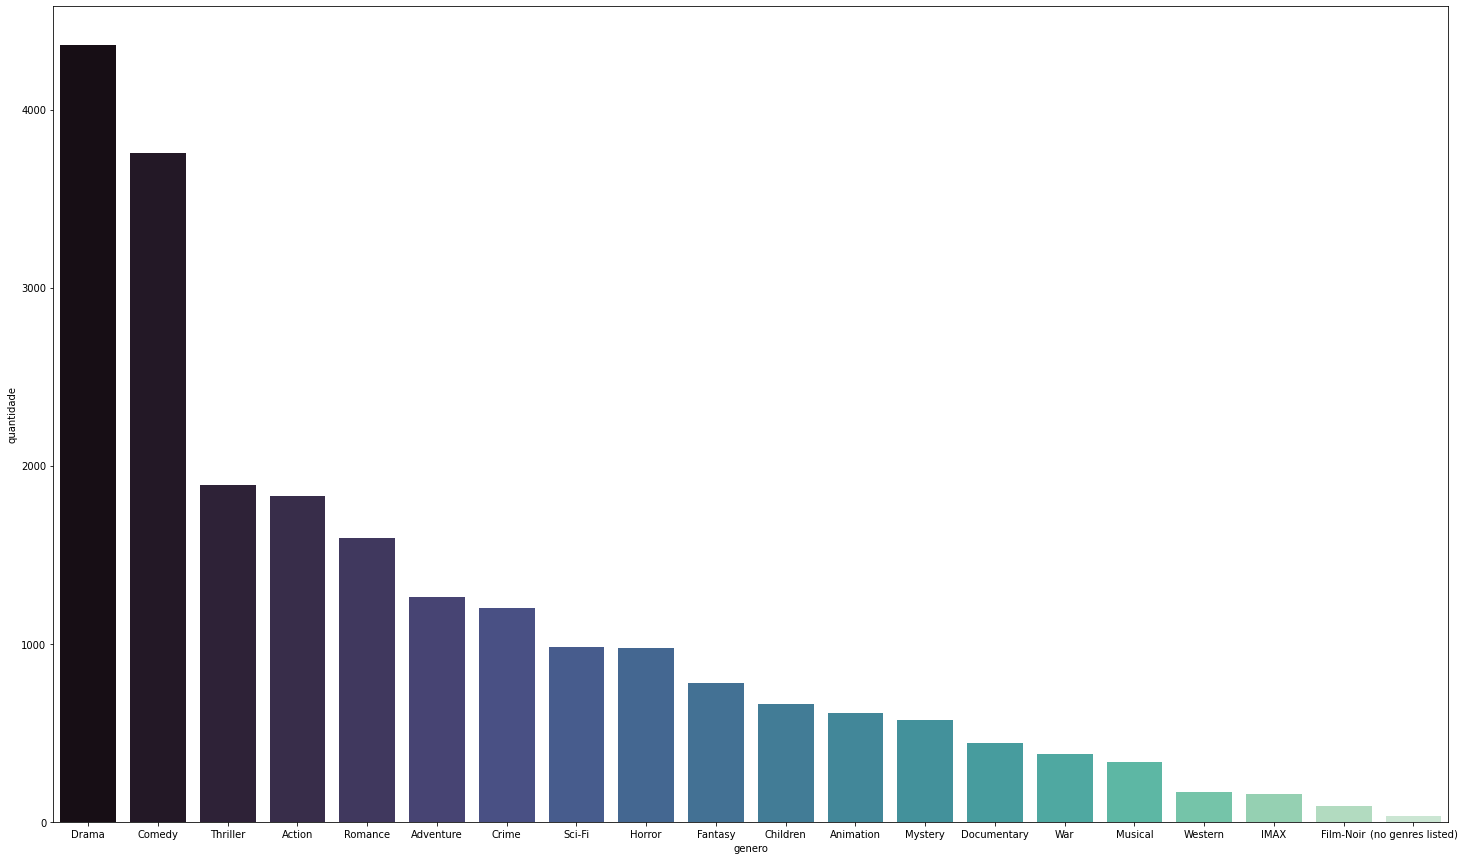

In [76]:
sns.barplot(x = 'genero', y = 'quantidade', data = total_generos_df, palette = "mako")

In [80]:
filmes.query('genres.str.contains("Comedy")', engine='python').head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
17,18,Four Rooms (1995),Comedy
18,19,Ace Ventura: When Nature Calls (1995),Comedy
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller


In [82]:
cada_genero = total_generos.unique()
cada_genero

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [86]:
filmes.query('genres.str.contains("Comedy")', engine='python').head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [87]:
aventura = 'Comedy'
filmes.query('genres.str.contains("{}")'.format(aventura), engine='python').head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [89]:
for genero in cada_genero:
  for filme in filmes:
    print(filmes.query('genres.str.contains("{}")'.format(genero), engine='python').head())

    movieId                title                                       genres
0         1     Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1         2       Jumanji (1995)                   Adventure|Children|Fantasy
7         8  Tom and Huck (1995)                           Adventure|Children
9        10     GoldenEye (1995)                    Action|Adventure|Thriller
12       13         Balto (1995)                 Adventure|Animation|Children
    movieId                title                                       genres
0         1     Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1         2       Jumanji (1995)                   Adventure|Children|Fantasy
7         8  Tom and Huck (1995)                           Adventure|Children
9        10     GoldenEye (1995)                    Action|Adventure|Thriller
12       13         Balto (1995)                 Adventure|Animation|Children
    movieId                title                                

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expr.py:705: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return self.const_type(res(*new_args, **kwargs), self.env)
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expr.py:705: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return self.const_type(res(*new_args, **kwargs), self.env)
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expr.py:705: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return self.const_type(res(*new_args, **kwargs), self.env)
